<div style="border:solid green 2px; padding: 20px">
Станислав, привет и хорошего дня! <br>
Меня зовут Сергей Дроздов, и я буду проверять твой проект. Предлагаю общаться на «ты». Если тебе удобнее общаться на "Вы", просто дай знать. 

Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Так будут выделены комментарии с указаниями, обязательными к выполнению. Без их выполнения проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Так будут выделены некритичные замечания. Их отработка позволит улучшить качество твоего проекта.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Так будут выделены остальные комментарии, полезные лайфхаки и ссылки на сторонние ресурсы </div>

Для наиболее эффективной и оперативной работы над проектом, мне хотелось бы иметь обратную связь. Не стесняйся задавать вопросы. Если ты что-либо меняешь в проекте, пожалуйста, комментируй это. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например вот так</div>

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


#### Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Пожалуйста, проверяй работоспособность кода на стороне сервера перед отправкой работы. На будущее: общепринято seaborn сокращать как sns</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Поменял путь на правильный,  насчет seaborn запомнил и поправил</div>

In [3]:
# Код ревьюера
# data = pd.read_csv('/datasets/games.csv')
# display(data.head())

#### Шаг 2. Подготовьте данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [4]:
# - Замените названия столбцов (приведите к нижнему регистру);
data.columns= data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
#Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
#data.info()


#Отсеем пустой год выпуска
data = data[data['year_of_release'].isna() == False]

data.user_score = data.user_score.replace('tbd', '0').fillna(0).astype(float)

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Довольно часто год выпуска игр на разных платформах не совпадает, т.к. пропусков в дате релиза очень мало, то проще их удалить </div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Удалил пустой год релиза</div>

In [6]:
data.info()
data['year_of_release'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16446 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


0

- year_of_release удалили пустой год выпуска, конвертировали в int т.к. год  является целочисленным. 
- При работе с user_score поймали ошибку: ```ValueError: could not convert string to float: 'tbd'``` 
- TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Окей, значит tbd  переведем в 0 а столбец конвертируем во float64 т.к. данные в столбце дробного  вида, пустые данные заполнили также значением 0 т.к. вычислить оценку пользователей не представляется возможным. 


<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Хорошо</div>

name - 0%
platform - 0%
year_of_release - 0%
genre - 0%
na_sales - 0%
eu_sales - 0%
jp_sales - 0%
other_sales - 0%
critic_score - 51%
user_score - 0%
rating - 41%


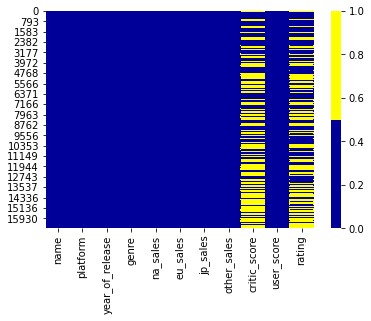

In [7]:
#Обработайте пропуски при необходимости:
#Вообще стоит глянуть  что у нас по пропускам, давайте построим тепловую карту и выведем процент пропусков текстом.
cols = data.columns
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

#Процентный список пропущенных данных
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


- Есть два столбца с большим поличеством пропусков: `critic_score` 51% пропусков и `rating ` 40%, принцип аналогичен предыдущим заменам,  если есть tbd, обработаем также как  пустые значения т.к. расчитать рейтинг или как оценят игру критики не представляется возможным. 

In [8]:
data.critic_score = data.critic_score.replace('tbd', '0').fillna(0)
data.rating = data.rating.replace('tbd', '0').fillna(0)

- Опишите причины, которые могли привести к пропускам;

Причин как обычно может быть несколько,  неправильные джойны  при выгрузке данных  в csv файл, некорректно заполнены данные в процессе заполнения, одной наиболее вероятной может  быть имеено причина tbd, т.е. рейтинг по играм просто еще не был расчитан. 

- TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Хорошо!

In [9]:
#Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
data['total_sales'] = data.na_sales + data.eu_sales + data.jp_sales + data.other_sales
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38


<div class="alert alert-success">
<b>Комментарий ревьюера:
    &#9989;</b> Хорошо, можно сделать и так <code>data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)</code>

#### Вывод по шагу:
- Все названия столбцов приведены к нижнему регистру
- Имелись пустые значения в столбцах **rating**, **user_score**, **critic_score**.  Заменили пустые значения в столбце: **year_of_release** на год от той же игры только другой платформы, в остальных установлено значение 0, дальше с этими значениями разберемся в процессе предобработки

<div class="alert alert-success">
<b>Комментарий ревьюера:
    &#9989;</b> Хорошо!

### Шаг 3. Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

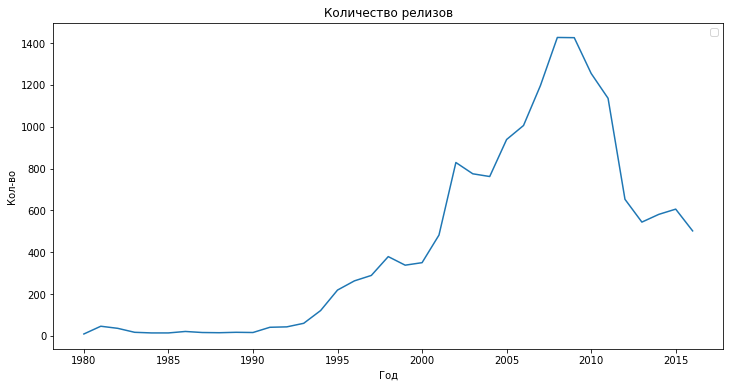

In [10]:
#Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
# Отсортируем таблицу и нарисуем график, отбросим нулевые значения year_of_release
games_on_period = data.query('year_of_release > 0').pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_on_period)
plt.title("Количество релизов")
plt.xlabel("Год")
plt.ylabel("Кол-во")
plt.legend('')

- По графику видно увеличение роста с 90х годов до 2008 года. 
- С 2008 года виден резкий спад, после массового внедрения мобильных игр. 
- Данные до 1990 года нас мало интересуют т.к. до этого периода никаких скачков не наблюдается. 
- Анализ данных будет проводиться за последние 3 года, с 2014 по 2016 для того чтобы захватить актуальные на текущий момент консоли. 

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Хорошо, доьавь, пожалуйста, ответ на вопрос "Важны ли данные за все периоды?". Если нет, то какой период выберешь для дальнейшего анализа?</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил ответ на "Важны ли данные за все периоды" и указал год для начала анализа</div>

- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Text(0, 0.5, 'Количество продаж')

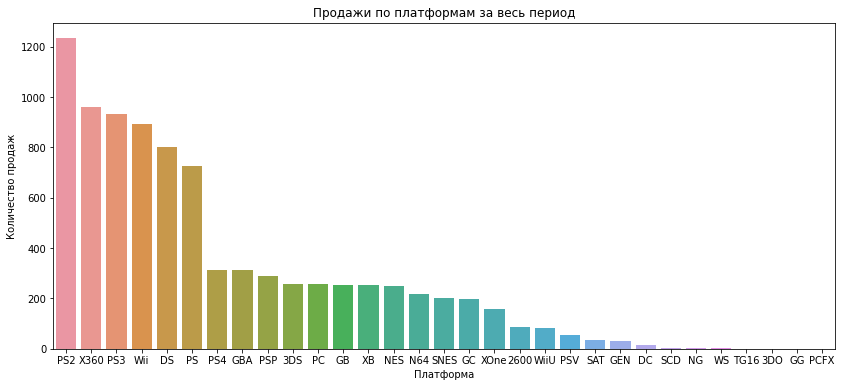

In [11]:
platform_on_sales = data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")

 - По графику видно, что топ 5 игровых платформ за весь период это PS2, X360, PS3, WII, DS

<div class="alert alert-success">
<b>Комментарий ревьюера:
    &#9989;</b> Хорошо!

In [12]:
# Напишем функцию, которая будет возвращать нужную таблицу и выводить данные
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] >= 2014)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Поправил вывод топ 5 платформ</div>

In [13]:
# Создадим свою таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.
top_5_platforms = data.query('year_of_release >= 2014').groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()

#top_5_platforms.columns = ('platform', 'total_sales')
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)
top_5_platforms

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22


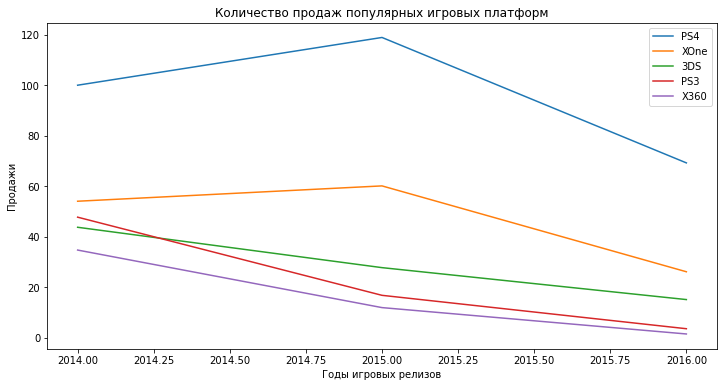

In [14]:
#Отрисуем все игровые платформы и их поведение за последние 10 лет
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,data)['total_sales'], label=i)
    plt.legend()

#### Вывод:

- Практически все игровые платформы существуют по 10 лет. 
- Cамые продаваемые это Sony Play Station 4 и XBOX One
- Самый пик наступает примерно через 5 лет после выхода приставки
- Лидер продаж: PS4, именно на нее стоит обратить внимание

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Можешь заметить, что PS2 и DS прекратили существование, остальные отмирают, поэтому прогнозировать продажи по ним будет бессмысленно. Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит.<br>Поэтому для дальнейшего анализа стоит пересмотреть актуальный период</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Пересмотрел актуальный период, решено использовать  для анализа данные за последние 3 года, оставил небольшой "хвост" с 2011 года для удобства наблюдения</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера V2: &#10060; </b> Хорошо, но если ты взял период за последние 3 года, то топ платформ у тебя немного изменится(см. код ниже)</div>

<div class="alert alert-info"> <b>Комментарий студента v2:</b>Спасибо! Учел!</div>

In [15]:
#Код ревьюера
data.query('year_of_release >= 2014').groupby('platform')['total_sales'].sum().sort_values(ascending=False)


platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [16]:
#Сохраним в переменной df_top_5_platforms топ 5 платформ и избавимся от выбросов
list_of_top5 = list(top_5_platforms.platform)

df_top_5_platforms = data[data['platform'].isin(list_of_top5)]
df_top_5_platforms = df_top_5_platforms[df_top_5_platforms['total_sales']<1.4]

df_top_5_platforms['total_sales'].describe()

count    3239.000000
mean        0.319546
std         0.329381
min         0.000000
25%         0.080000
50%         0.190000
75%         0.470000
max         1.390000
Name: total_sales, dtype: float64

<div class="alert alert-success">
<b>Комментарий ревьюера V3:
    &#9989;</b> Отлично!

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Нашел и поправил ошибки в топ 5  платформ</div>

Text(0, 0.5, 'Глобальные продажи')

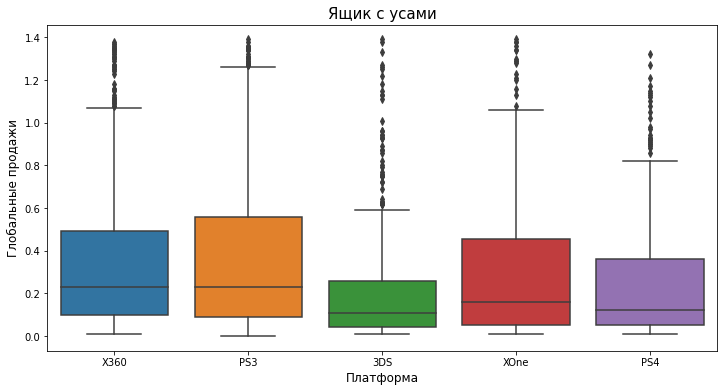

In [17]:
#Отрисуем ящики с усами 
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

#### Вывод:

- Сделали срез данных для отображения ящиков с усами. 
- Исходя из графиков видно, что медиана протекает у всех по разному
- Больше всех продаж у PS3, затем XOne, после X360, PS4 и 3DS на последнем месте. 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

<div class="alert alert-info"> <b>Комментарий студента:</b> Переписал анализ с PS2  на PS3</div>

In [18]:
#Корреляция между оценками пользователей и продажами 
sony_play_station3 = data[data['platform']=='PS3']

sony_play_station3 = sony_play_station3.query('user_score > 0') #отбрасываем значения которые отметили как 0

sony_play_station3['user_score'].corr(sony_play_station3['total_sales'])

0.12841562938563006

Text(0.5, 1.0, 'test')

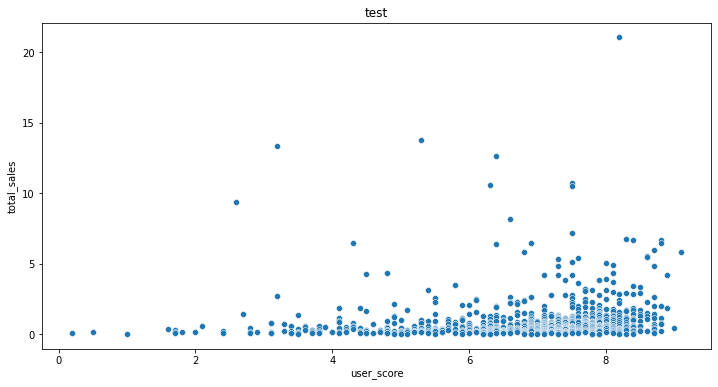

In [19]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_play_station3)
plt.title('test')

Text(0.5, 1.0, 'test')

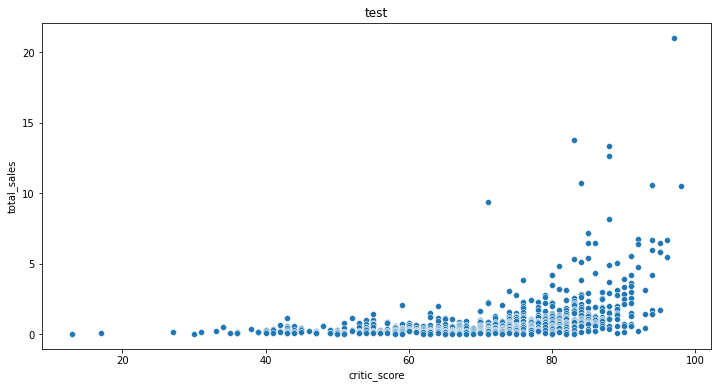

In [20]:
#Построим диаграмму рассеяния по оценкам критиков 
sony_play_station3 = sony_play_station3.query('critic_score > 0') #отбрасываем значения которые отметили как 0

plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_play_station3)
plt.title('test')

In [21]:
#Корреляция между оценкой критиков и продажам
sony_play_station3['critic_score'].corr(sony_play_station3['total_sales'])

0.4282129041298839

In [22]:
#функция определения корреляции
def correlator(crr = 0): 
    corr_description = 'Не определена' 
    if 0.3 >= crr >= 0.1:
        corr_description = 'Слабая'
    if 0.5 >= crr >= 0.3:
        corr_description = 'Умеренная'
    if 0.7 >= crr >= 0.5:
        corr_description = 'Высокая'
    if 0.9 >= crr >= 0.7:
        corr_description = 'Очень высокая'
    if 1 >= crr >= 0.9:
        corr_description = 'Сильная'
    return corr_description     

In [23]:
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def other_platform_matrix(name_of_platform):
    platform = data[data['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    correl_desc = correlator(correl)
    critic_correl_desc = correlator(critic_correl)
    
    print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), critic_correl_desc,  critic_correl)
    
    print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), correl_desc,  correl)
    
    print('\n')

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Можешь заметить, что у тебя код повторяется, что не очень хорошо. Впринципе можно было обойтись без разъяснения коэффециентов корреляции, оставить только значения</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Немного оптимизировал, добавив функцию определения силы корреляции "correlator"</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:
    &#9989;</b> Хорошо!

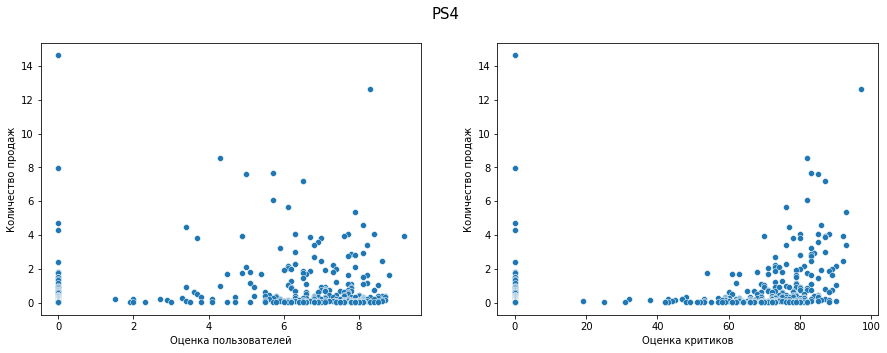

Корреляция между отзывами критиков и игровой платформой  PS4 Слабая 0.22754960627752652
Корреляция между отзывами пользователей и продажами  PS4 Слабая 0.11311562450852881




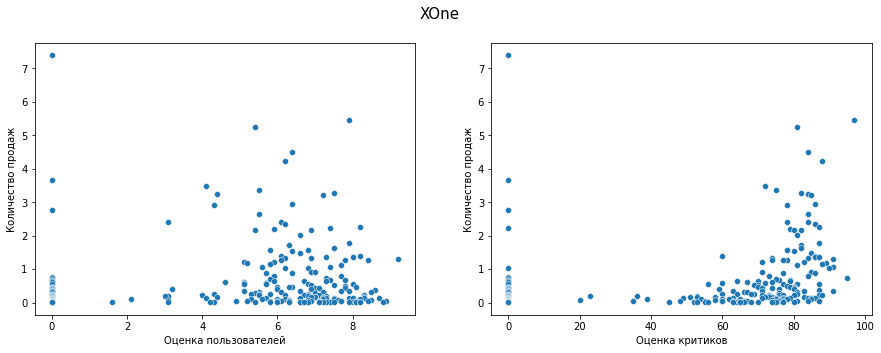

Корреляция между отзывами критиков и игровой платформой  XONE Слабая 0.2748391874944539
Корреляция между отзывами пользователей и продажами  XONE Слабая 0.11656261405851895




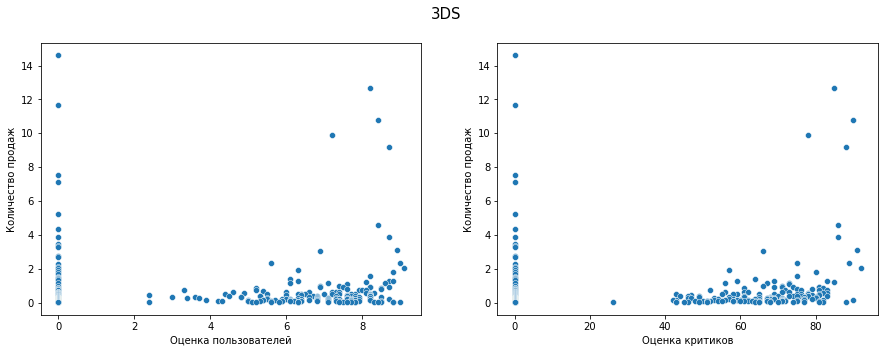

Корреляция между отзывами критиков и игровой платформой  3DS Слабая 0.16702057976149196
Корреляция между отзывами пользователей и продажами  3DS Слабая 0.1500533936060986




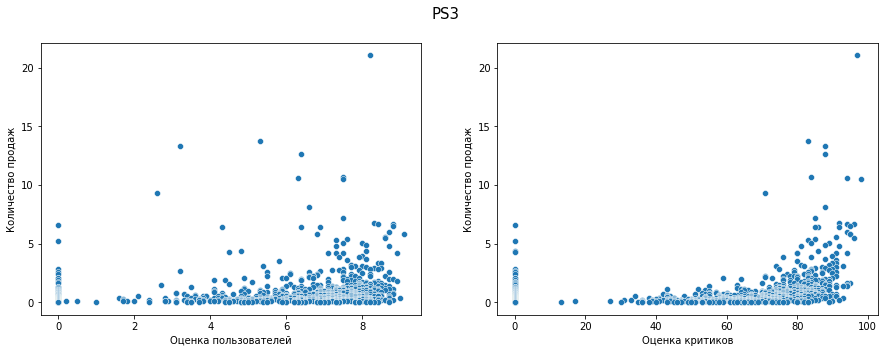

Корреляция между отзывами критиков и игровой платформой  PS3 Умеренная 0.35514556594230773
Корреляция между отзывами пользователей и продажами  PS3 Слабая 0.2745827060165664




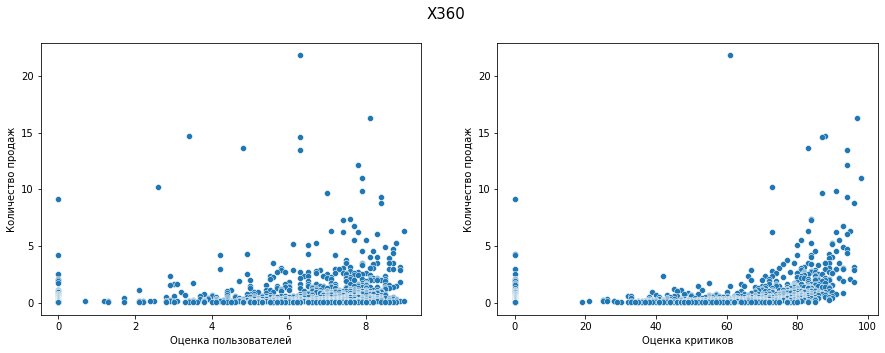

Корреляция между отзывами критиков и игровой платформой  X360 Умеренная 0.3117562516201688
Корреляция между отзывами пользователей и продажами  X360 Слабая 0.20780580062906845




In [24]:
#С помощью цикла выведем все 5 графиков
for platform in list_of_top5:
    other_platform_matrix(platform)

In [25]:
#Посчитаем дисперсию, стандартное отклонение, среднее и медиану у топ 5 платформ к оценкам пользователей
for platform in list_of_top5:
    print('Дисперсия', platform,':', np.var(data[data['platform']==platform]['user_score']))
    print('Стандартное отклонение', platform,':', np.std(data[data['platform']==platform]['user_score']))
    print('Среднее',platform,':',  data[data['platform']==platform]['user_score'].mean())
    print('Медиана',platform,':',  data[data['platform']==platform]['user_score'].median())
    print('\n')

Дисперсия PS4 : 11.673060638796336
Стандартное отклонение PS4 : 3.4165861087928597
Среднее PS4 : 4.424234693877551
Медиана PS4 : 6.1


Дисперсия XOne : 9.644061367994883
Стандартное отклонение XOne : 3.105488909655754
Среднее XOne : 4.805263157894737
Медиана XOne : 6.0


Дисперсия 3DS : 11.115316429138186
Стандартное отклонение 3DS : 3.3339640713628254
Среднее 3DS : 2.2884765624999996
Медиана 3DS : 0.0


Дисперсия PS3 : 11.552679475573921
Стандартное отклонение PS3 : 3.3989232818017414
Среднее PS3 : 4.429938744257274
Медиана PS3 : 6.0


Дисперсия X360 : 9.572836527818772
Стандартное отклонение X360 : 3.09400008529715
Среднее X360 : 5.124431818181819
Медиана X360 : 6.4




In [26]:
#Посчитаем дисперсию, стандартное отклонение, среднее и медиану у топ 5 платформ к оценкам критиков
for platform in list_of_top5:
    print('Дисперсия', platform,':', np.var(data[data['platform']==platform]['critic_score']))
    print('Стандартное отклонение', platform,':', np.std(data[data['platform']==platform]['critic_score']))
    print('Среднее',platform,':',  data[data['platform']==platform]['critic_score'].mean())
    print('Медиана',platform,':',  data[data['platform']==platform]['critic_score'].median())
    print('\n')

Дисперсия PS4 : 1293.0472134006664
Стандартное отклонение PS4 : 35.958965688693915
Среднее PS4 : 46.34438775510204
Медиана PS4 : 64.5


Дисперсия XOne : 1275.8334344113166
Стандартное отклонение XOne : 35.7188106522504
Среднее XOne : 50.17004048582996
Медиана XOne : 67.0


Дисперсия 3DS : 1038.1478881835938
Стандартное отклонение 3DS : 32.22030242228638
Среднее 3DS : 21.7734375
Медиана 3DS : 0.0


Дисперсия PS3 : 1296.4612103637587
Стандартное отклонение PS3 : 36.00640512969545
Среднее PS3 : 43.38208269525268
Медиана PS3 : 58.0


Дисперсия X360 : 1104.2760840519059
Стандартное отклонение X360 : 33.230649768728654
Среднее X360 : 49.84172077922078
Медиана X360 : 62.0




- Практически у всех платформ присутствуем корреляция, между оценками пользователей и критиков к продажам.
- Оценка пользователей слабо влияет на продажи, чего не скажешь о оценке критиков. Покупатели прислушиваются больше к критикам чем к оценкам других пользователей

<div class="alert alert-danger">
<b>Комментарий ревьюера V3: &#10060; </b> Хорошо,но все же коэффицент корреляции 0.2 для оценки пользователей довольно низкий, и нельзя сказать, что оценка пользователей хоть как-то влияет на продажи

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [27]:
# Методом сводных таблиц выведем жанры и их продажи.  отсортируем по убыванию. 
distr_genre = data.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,Action,1716.52
1,Sports,1309.67
2,Shooter,1041.36
3,Role-Playing,931.08
4,Platform,825.55
5,Misc,790.29
6,Racing,723.49
7,Fighting,442.66
8,Simulation,387.96
9,Puzzle,239.89


<div class="alert alert-danger">
<b>Комментарий ревьюера V3: &#10060; </b> Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи.</div>

Text(0, 0.5, 'Продажи')

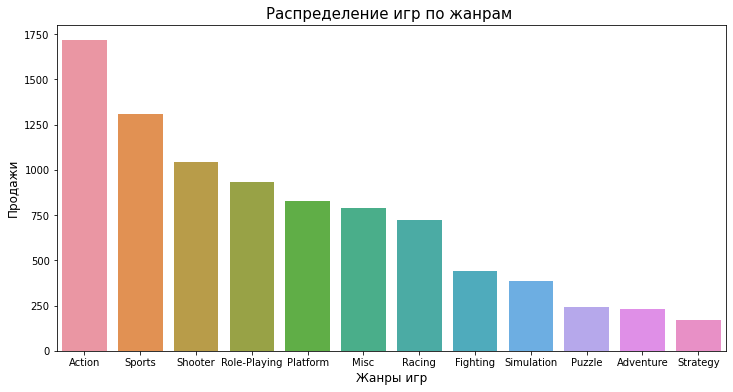

In [28]:
#Отрисуем барплот для наглядности
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

- Лучше всего продаются жанры Экшн. Стратегии на последнем месте.

#### Вывод по исследовательскому анализу данных:

- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
- Самые популярные игровые платформы за период : Sony PlayStation 4, Xbox One, Nintendo 3 DS, Sony Playstation 3, Xbox 360.
- Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
- Больше всего продаются игры на Sony Playstation 4 и Xbox One
- У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей

### Шаг 4. Составьте портрет пользователя каждого региона

- Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [29]:
#Напишем функции для создания сводных таблиц и отсривоки барплотов

#Функция для создания сводбных таблиц за весь период
def forpivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = data.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n') 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

#Функция для создания сводных таблиц за последний год
def for_pivot_last(row, title):
    temp = data[data['year_of_release']>2015]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n')
        sns.set_palette("BuGn_r")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

Портрет пользователя North America

  platform  na_sales
0     X360    595.74
1      PS2    572.92
2      Wii    486.87
3      PS3    390.13
4       DS    380.31



      genre  na_sales
0    Action    863.17
1    Sports    671.20
2   Shooter    584.83
3  Platform    444.44
4      Misc    399.57



  rating  na_sales
0      E   1274.24
1      0   1227.62
2      T    747.60
3      M    742.89
4   E10+    345.50





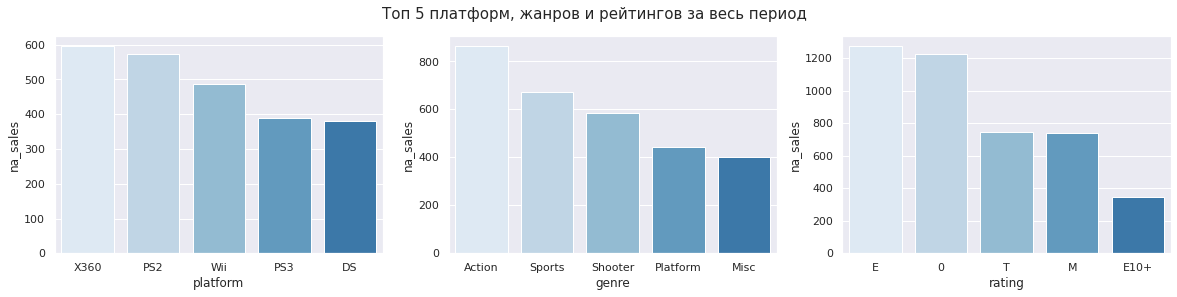

In [30]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период
forpivot('na_sales','Топ 5 платформ, жанров и рейтингов за весь период')

  platform  na_sales
0      PS4     21.49
1     XOne     14.27
2      3DS      4.14
3     WiiU      2.10
4       PC      1.36



          genre  na_sales
0       Shooter     16.24
1        Action      9.29
2        Sports      7.54
3  Role-Playing      5.89
4      Fighting      1.84



  rating  na_sales
0      M     15.67
1      T      8.95
2      0      8.53
3      E      7.97
4   E10+      3.81





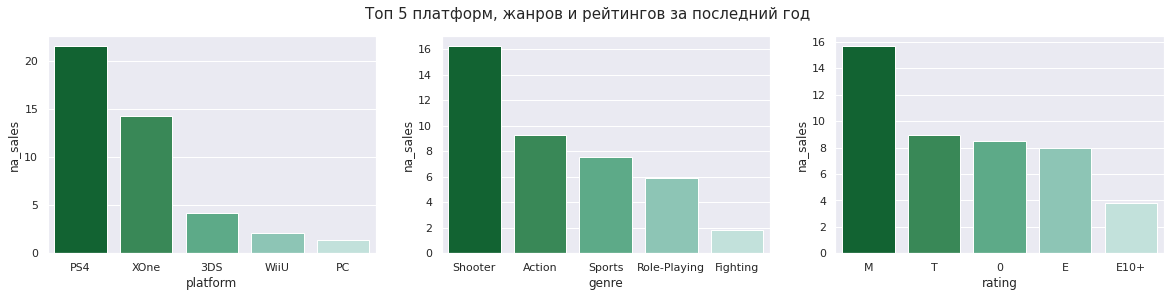

In [31]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год
for_pivot_last('na_sales','Топ 5 платформ, жанров и рейтингов за последний год')

#### Вывод:

- Самые популярные игровые платформы в северной америке за все время это: XBOX 360, PS2, WII, PS3, DS
- Топ 5 жанров в северной америке за все время: action, sports, shooter, platform, misc
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

- Если посмотреть с 2015 по 2016 года, то мы видим как интерес кардинально меняется:
- Топ игровых приставок выглядит таким образом : PS4, Xone, DS3
- Топ жанров игр: Shooter, Action, Sports
- Топ рейтингов игр : "От 17 и выше" , "от 13 и выше" и "для всех"


<div class="alert alert-danger">
<b>Комментарий ревьюера V3: &#10060; </b> Отлично, но при твоем способе подсчета игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах.</div>

Портрет пользователя European Union

  platform  eu_sales
0      PS2    332.63
1      PS3    327.21
2     X360    268.32
3      Wii    258.32
4       PS    212.39



     genre  eu_sales
0   Action    510.99
1   Sports    371.33
2  Shooter    314.52
3   Racing    234.49
4     Misc    210.60



  rating  eu_sales
0      E    703.87
1      0    610.18
2      M    480.00
3      T    421.79
4   E10+    183.35





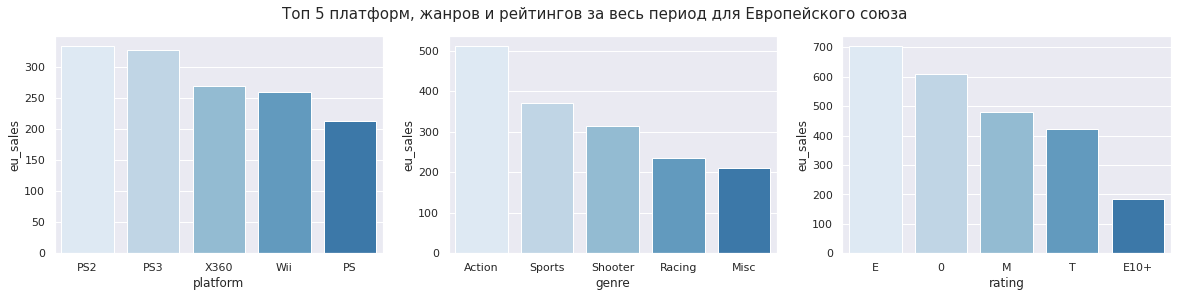

In [32]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период для Европейского союза
forpivot('eu_sales','Топ 5 платформ, жанров и рейтингов за весь период для Европейского союза')

  platform  eu_sales
0      PS4     31.78
1     XOne      9.63
2       PC      3.53
3      3DS      2.33
4     WiiU      1.48



          genre  eu_sales
0       Shooter     15.90
1        Sports     12.01
2        Action     10.68
3  Role-Playing      4.28
4        Racing      1.77



  rating  eu_sales
0      M     16.54
1      E     13.61
2      T      9.79
3      0      7.47
4   E10+      3.81





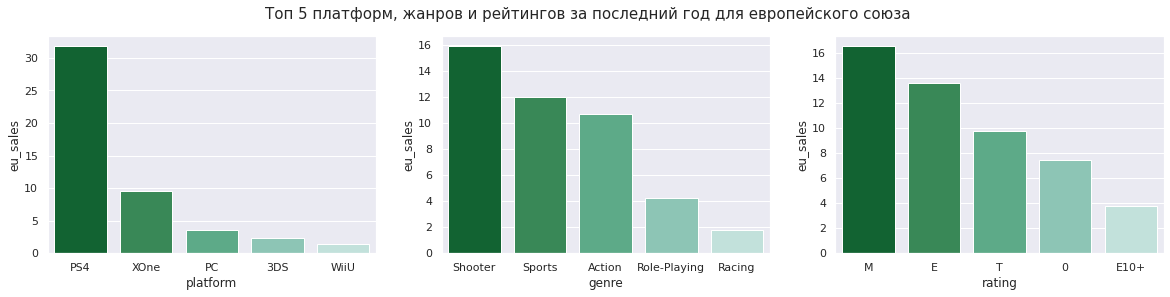

In [33]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год для европейского союза
for_pivot_last('eu_sales','Топ 5 платформ, жанров и рейтингов за последний год для европейского союза')

#### Вывод:

- Самые популярные игровые платформы в Европе это: PS2, PS3, X360, WII, PS
- Топ 5 жанров в Европе : action, sports, shooter, racing, misc
- По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

- За последний год интерес у пользователя кардинально изменился:
- Топ жанров стал: shooter, sports, action
- Топ платформ: PS4, Xone, PC
- Топ рейтингов: "От 17 и выше" , "Для всех" и "от 13 и выше"

Портрет пользователя Japanese

  platform  jp_sales
0       DS    175.02
1       PS    139.78
2      PS2    137.54
3     SNES    116.55
4      3DS    100.62



          genre  jp_sales
0  Role-Playing    353.39
1        Action    160.14
2        Sports    134.93
3      Platform    130.71
4          Misc    107.02



  rating  jp_sales
0      0    836.77
1      E    197.96
2      T    150.70
3      M     63.58
4   E10+     40.20





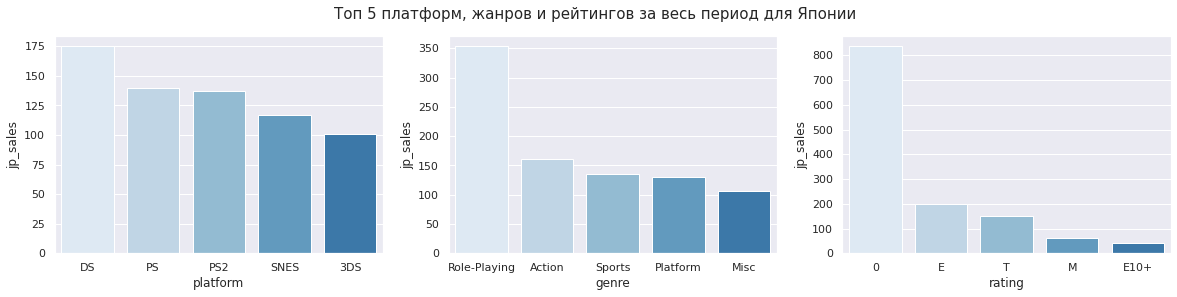

In [34]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период для Японии
forpivot('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период для Японии')

  platform  jp_sales
0      3DS      8.03
1      PS4      5.74
2      PSV      3.56
3      PS3      1.30
4     WiiU      0.67



          genre  jp_sales
0        Action      7.07
1  Role-Playing      6.61
2     Adventure      1.18
3       Shooter      1.06
4          Misc      1.04



  rating  jp_sales
0      0     14.32
1      T      2.27
2      M      1.20
3      E      1.07
4   E10+      0.45





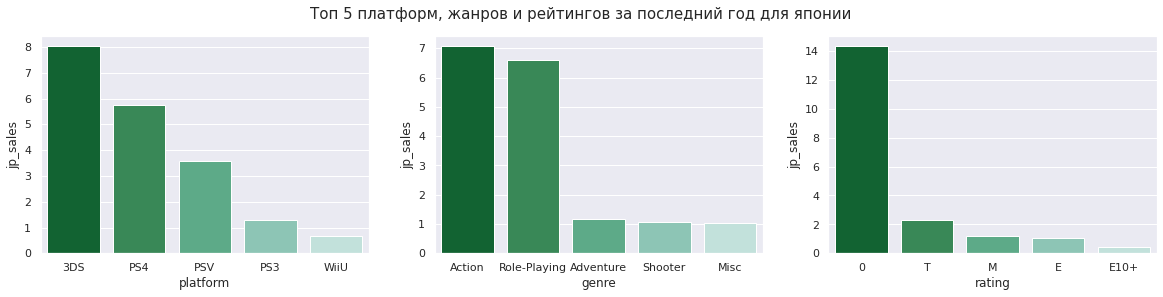

In [35]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год для японии
for_pivot_last('jp_sales','Топ 5 платформ, жанров и рейтингов за последний год для японии')

#### Вывод:

- Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS
- Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc
- По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

- За последний год интерес у пользователя кардинально изменился
- Топ Жанров: action, role-playing, adventure
- топ платформ: 3ds, ps4, psv
- топ рейтингов: "от 13 и выше", "от 17 и выше" и "для всех

#### Вывод по составлению портрета пользователя каждого региона

- Самые популярные игровые платформы в северной америке это: XBOX, PS2, WII, PS3, DS Топ 5 жанров в северной америке : action, sports, shooter, platform, misc По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

- Самые популярные игровые платформы в Европе это: PS2, PS3, XBOX, WII, PS Топ 5 жанров в Европе : action, sports, shooter, racing, misc По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

- Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

- Если брать данные за последний год:
То в Северной Америке:
топ игровых платформ выглядит так: PS4, Xone, DS3
Топ Жанров игр: Shooter, Action, Sports
Топ Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех"


- В Европейском союзе:
Топ игровых платформ : PS4, Xone, PC
Топ жанров: Shooter, Sports, Action
Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше"


- В Японии:
Топ игровых платформ : 3DS, PS4, PSV
Топ жанров: Action, Role-playing, Adventure
Топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех"


Для прогноза будущих продаж лучше брать данные за последний год, так как технологии меняются с очень быстрыми темпами, и вкусы людей также могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше

### Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports разные.
- Задайте самостоятельно пороговое значение alpha.

Поясните:

- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

In [36]:
#Написали переменную для упрощения рутины
def hipotesis(alpha=.01, first_data='', expression='equals', second_data='', equal_var=False):
    #метод ttest_ind
    results = st.ttest_ind(first_data.dropna(), second_data.dropna(), equal_var=False)
   
    print('p-значение:', results.pvalue)
    
    if expression == 'equals':
        if (results.pvalue < alpha):
            print("Отвергаем нулевую гипотезу")
        else:
            print("Не получилось отвергнуть нулевую гипотезу")           

#### *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [37]:
# Сохраним в переменных xbox_hyp и pc_hyp соответствующие данные (актуальные данные за последние 10 лет)
xone_hyp = data[(data['platform']=='XOne') & (data['year_of_release']>2006)]['user_score']
pc_hyp = data[(data['platform']=='PC') & (data['year_of_release']>2006)]['user_score']

#Посчитаем средний рейтинг пользователя для xbox платформ
xone_hyp.mean()

4.805263157894737

In [38]:
#Посчитаем средний рейтинг пользователя для PC платформ
pc_hyp.mean()

5.335773480662983

In [39]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind
hipotesis(alpha=.01, first_data = xone_hyp, expression = 'equals', second_data= pc_hyp, equal_var=False)   

p-значение: 0.02083455127372652
Не получилось отвергнуть нулевую гипотезу


##### Вывод: 

Значение p-value около 1%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, с вероятностью в 1% можно получить различность рейтингов двух платформ

<div class="alert alert-success">
<b>Комментарий ревьюера:
    &#9989;</b> Отлично!

#### *Средние пользовательские рейтинги жанров Action и Sports разные*

Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [40]:
# Сохраним в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками
genre_action_hyp = data[(data['genre']=='Action') & (data['year_of_release']>2006)]['user_score']
genre_sports_hyp = data[(data['genre']=='Sports') & (data['year_of_release']>2006)]['user_score']

#выведем среднюю оценку по жанру экшн
genre_action_hyp.mean()

3.775705186533212

In [41]:
#выведем среднюю оценку по жанру спорт
genre_sports_hyp.mean()

3.3055160142348754

In [42]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind
hipotesis(alpha=.01, first_data = genre_action_hyp, expression = 'equals', second_data= genre_sports_hyp, equal_var=False)    
 

p-значение: 0.00019396422427015982
Отвергаем нулевую гипотезу


#### Вывод: 
Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.

<div class="alert alert-success">
<b>Комментарий ревьюера:
    &#9989;</b> Отлично!

#### Вывод по проверке гипотез

Проверили гипотезы по ТЗ:

- Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

### Шаг 6. Общий вывод


- Перед анализом, данные были подготовлены: приведены к нижнему регистру названия столбцов и сами данные приведены к правильным типам.
- Определили, что аббревиатура TBD значит to be determined, to be done. То есть данные были нарочно не заполнены. Поэтому заменили tbd на 0 для проведения дальнейшего анализа
- Выполнив первоначальный анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как массово начали мобильные игры, произошел резкий спад разработок консольных игр
- За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS
- Также мы выявили, что средняя продолжительность жизни игровой приставки около 10 лет. Пик продаж наступает примерно через 5 лет после выпуска консоли
- Также по результатам анализа выяснили что у Nintendo WII был резкий скачок в 2009 году и такой же резкий провал. Причиной может быть тот же самый скачок релиза игр на мобильных платформах. 
- Анализ оценок пользователей и критиков выявил взаимосвязь оценки критиков и пользователей с продажами самих игр. Чем больше оценка критиков или пользователей, тем лучше продажа игры.
- Так же выяснили, что самый популярный жанр за все время это Экшн. На последнем месте стратегии.

- Также был составлен портрет пользователя для каждого региона.
- В Северной америке самые популярные жанры: action, sports, shooter. Консоли: XBOX, PS2 и WII. А по рейтингу игр люди предпочитают игры с рейтингами: "для всех", "от 13 и выше" и "от 17 и выше".
- В Европе, популярные жанры аналогичны Северной Америке. А выбор приставок выглядит следующим образом по очередности: PS2, PS3, XBOX. Рейтинг игр отличается вторым местом, на втором месте у них от 17 и выше, а на третьем 13 и выше.
- В японии люди предпочитают игровые приставки: DS, PS, PS2. А жанры игры : Role-playing, action и sports. Рейтинг игр аналогичный Северной Америке.

- Исходя из всех данных предполагаем, что лучше всего продавать игры для таких приставок как Sony Playstation 4
- Жанр необходимо выбирать Shooter и выбирать игры с рейтингом "от 17 и выше", это позволит увеличить продажи.

<b>Итоговый комментарий ревьюера: &#10060; </b>Молодец, отличная работа, хорошо структурированные выводы. Супер, что строишь графики в seaborn. Гипотезы сформулированы верно, выводы корректные. Есть пара критических моментов, которые необходимо исправить, а именно:
- работоспособность кода
- актуальный период
- анализ и выводы для топ платформ, соответствующих исправленному актуальному периоду

Если возникли какие-либо вопросы - не стесняйся их задавать. Ниже оставлю пару ссылок для самообучения. Удачи!

<div class="alert alert-success">
<b>Рубрика “Полезные ссылки”:
✅</b> <br>
<a href = "https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html">Коэффициенты корреляции</a><br>
<a href = "https://www.researchgate.net/profile/Paul-Louangrath/post/Ranking_or_scoring_variables_using_conditional_probability/attachment/59d63c45c49f478072ea7c1a/AS%3A273748962283533%401442278246675/download/100+Statistical+Tests.pdf">100 Statistical tests</a><br>
<a href = "https://loginom.ru/blog/missing">Обработка пропусков</a><br>
<a href = "https://coderlessons.com/tutorials/python-technologies/izuchai-siborna/siborn-kratkoe-rukovodstvo"> Seaborn</a><br>
<a href = "https://habr.com/ru/post/502958/"> Plotly</a><br>
<a href = "https://medium.com/@jetbootsmaker/%D0%BF%D0%BE%D0%B2%D1%8B%D1%88%D0%B0%D0%B5%D0%BC-%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D1%81%D1%82%D1%8C-%D0%BF%D1%80%D0%B8-%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B5-%D1%81-jupyter-notebook-81a1cab8bac1"> Повышаем продуктивность при работе с Jupyter</a><br>
<a href = "https://towardsdatascience.com/5-things-you-should-know-about-covariance-26b12a0516f1">5 Things You Should Know About Covariance</a>
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Сергей, спасибо тебе большое за ревью проекта и ссылки на полезную информацию! Я обязательно почитаю и стану лучше писать код, честно честно :)</div>

<b>Итоговый комментарий ревьюера V2: &#10060; </b>Молодец, что учел дублирование кода. Пересмотри, пожалуйста топ платформ. Так же прогоняй код перед запуском(когда менял PS2 на PS3 забыл переименовать переменны)

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Погонял, учел, топ 5 платформ</div>

<b>Итоговый комментарий ревьюера V3: &#10060; </b>Отлично, осталось исправить пару критических замечаний, а именно:
- не учитываются игры без рейтинга
- коэффициенты корреляции
- самые прибыльные жанры